# Proyek Analisis Data: Bike Sharing
- **Nama:** Sultan Fahd Muhammad Bahruddin Yusuf
- **Email:** sultanyusuf2936@gmail.com
- **ID Dicoding:** sultanfahd

## Menentukan Pertanyaan Bisnis

- Which season records the highest and lowest levels of bike sharing activity?<br>
- At what times are bike sharing activity levels highest and lowest? <br>
- How does the number of registered users compare to that of casual users?<br>
- How has the performance of rentals been in recent years?



## Import Semua Packages/Library yang Digunakan

In [2]:
#Required Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
#Creat dataset hour_df of hour.csv
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [5]:
#Check type of data from dataset
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
#Check type of data from dataset
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
#Check the dataset day_df for missing values
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
#Check the dataset hour_df for missing values
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
#Check duplicate rows for dataset hour_df and day_df 
print("Count of duplicate for day_df: ", day_df.duplicated().sum())
print("Count of duplicate for hour_df: ", hour_df.duplicated().sum())

Count of duplicate for day_df:  0
Count of duplicate for hour_df:  0


There is nothing duplicate rows in the hour_df and day_df dataset ✅

### Cleaning Data

What i can do in cleaning data?
 
- Remove the column "instant" because index 
- Change the data type in the "season", "mnth", "holiday","weekdays", and "weathersit" columns to category data (Because they have variations)
- Converting to DateTime data type on column "dteday"
- Rename columns to make them readable
- Rename the contents of the columns to make it understandable
- Creat the new column  called "category_day" which contents weekend or weekdays

Remove Column

In [10]:
#Remove/Dropping the column "instant" of day_df dataset
day_df.drop(columns=["instant"], inplace = True)

In [11]:
#Remove/Dropping the column "instant" of hour_df dataset
hour_df.drop(columns=["instant"], inplace=True)

Change/Converting the data type

In [12]:
#Change data type int to category on columns "season", "mnth", "holiday","weekdays", and "weathersit"
columns=["season", "mnth", "holiday", "weekday", "weathersit"]

for  col in columns:
    day_df[col] = day_df[col].astype("category")
    hour_df[col] = hour_df[col].astype("category")    

In [13]:
#Converting the column of "dteday" to DateTime
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

Rename Columns

In [14]:
#Rename columns to make it readable 
hour_df.rename(columns={"dteday":'date', "mnth":'month', 'hr':'hour', 'weekday':'day', 'yr':'year', 'weathersit': 'weather_situation', 'cnt': 'count'}, inplace=True)
day_df.rename(columns={"dteday":'date', "mnth":'month', 'hr':'hour', 'weekday':'day' , 'yr':'year', 'weathersit': 'weather_situation', 'cnt': 'count'}, inplace=True)
hour_df

,date,season,year,month,hour,holiday,day,workingday,weather_situation,temp,atemp,hum,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


Convertion contents of columns

In [15]:
#Season; 1:springer, 2:summer, 3:fall, 4:winter
hour_df.season.replace((1,2,3,4), ('springer', 'summer', 'fall', 'winter'), inplace=True)
day_df.season.replace((1,2,3,4), ('springer', 'summer', 'fall', 'winter'), inplace = True)

#year; 0:2011, 1:2012
hour_df.year.replace((0,1),(2011,2012),inplace=True)
day_df.year.replace((0,1),(2011,2012),inplace=True)

#month; 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),("Jan", "Feb", "Mar", "Apr", "May", "Jun","Jul","Aug", "Sep", "Oct", "Nov", "Dec"),inplace=True)
day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),("Jan", "Feb", "Mar", "Apr", "May", "Jun","Jul","Aug", "Sep", "Oct", "Nov", "Dec"),inplace=True)

#day; 0:Sun, 1:Mon, 2:Tue, 3:Wed,  4:Thu, 5:Fri, 6:Sat
hour_df.day.replace((0,1,2,3,4,5,6),("Sun","Mon","Tue","Wed","Thu","Fri","Sat"),inplace=True)
day_df.day.replace((0,1,2,3,4,5,6),("Sun","Mon","Tue","Wed","Thu","Fri","Sat"),inplace=True)

#weather_situation; 1:Clear, 2:Mist, 3:Light_rainsnow, 4:Heavy_rainsnow
hour_df.weather_situation.replace((1,2,3,4),("Clear", "Mist", "Light_rainsnow", "Heavy_rainsnow"), inplace=True)
day_df.weather_situation.replace((1,2,3,4),("Clear", "Mist", "Light_rainsnow", "Heavy_rainsnow"), inplace=True)

hour_df.head()

,date,season,year,month,hour,holiday,day,workingday,weather_situation,temp,atemp,hum,windspeed,casual,registered,count
0,2011-01-01,springer,2011,Jan,0,0,Sat,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,springer,2011,Jan,1,0,Sat,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,springer,2011,Jan,2,0,Sat,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,springer,2011,Jan,3,0,Sat,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,springer,2011,Jan,4,0,Sat,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


New column

In [16]:
#Create new column "Category_days"
def get_category(days):
    if days in ["Sun","Sat"] :
        return  "Weekend"
    else:
        return "Weekday"
    
hour_df["Category_days"]=hour_df["day"].apply(get_category)
day_df["Category_days"]=hour_df["day"].apply(get_category)



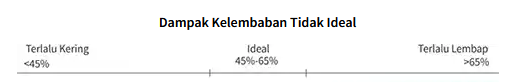

"Health experts recommend air humidity levels (or what is called Relative Humidity – RH) in the range of 45% - 65%, as the ideal level."

In [17]:
label=["Too dry", "Ideal", "Too  humid"]
bins=[0,0.44,0.65,1]
hour_df["Category_Humidity"] = pd.cut(hour_df["hum"],labels=label, bins=bins)
day_df["Category_Humidity"] = pd.cut(day_df["hum"],labels=label, bins=bins)

- Remove the column "instant" because index ✅
- Change the data type in the "season", "mnth", "holiday","weekdays", and "weathersit" columns to category data (Because they have variations)✅
- Converting to DateTime data type on column "dteday"✅
- Rename columns to make them readable✅
- Rename the contents of the columns to make it understandable✅
- Creat the new column  called "category_day" which contents weekend or weekdays✅

## Exploratory Data Analysis (EDA)

### Explore hour_df dataset

In [18]:
#Statistics of hour_df dataset
hour_df.describe(include="all")

,date,season,year,month,hour,holiday,day,workingday,weather_situation,temp,atemp,hum,windspeed,casual,registered,count,Category_days,Category_Humidity
count,17379,17379,17379.000000,17379,17379.000000,17379.0,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17357
unique,NaN,4,NaN,12,NaN,2.0,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,fall,NaN,May,NaN,0.0,Sat,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekday,Too humid
freq,NaN,4496,NaN,1488,NaN,16879.0,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365,7969
mean,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,NaN,NaN,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,NaN,NaN,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,NaN,NaN,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,NaN,NaN,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,NaN,NaN,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN


In [19]:
#grouping bike sharing based on hours
users_by_hour = hour_df.groupby("hour").agg({"count":["sum"]})
users_by_hour



,count
,sum
hour,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


In [20]:
#find for index and maximum/minimum of bike sharing based on hours
max_index_hour = users_by_hour["count"].idxmax(axis=0)["sum"]
max_value_hour = users_by_hour["count"].max()["sum"]

min_index_hour = users_by_hour["count"].idxmin(axis=0)["sum"]
min_value_hour = users_by_hour["count"].min()["sum"]


print("The highest time for bike sharing users at {}PM with the number of {} users".format(max_index_hour, max_value_hour))
print("The lowest time for bike sharing users at {}PM with the number of {} users".format(min_index_hour, min_value_hour))

The highest time for bike sharing users at 17PM with the number of 336860 users
The lowest time for bike sharing users at 4PM with the number of 4428 users


### Explore day_df dataset

In [21]:
#Statistics of day_df dataset
day_df.describe(include="all")

,date,season,year,month,holiday,day,workingday,weather_situation,temp,atemp,hum,windspeed,casual,registered,count,Category_days,Category_Humidity
count,731,731,731.000000,731,731.0,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,730
unique,NaN,4,NaN,12,2.0,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,fall,NaN,Jan,0.0,Sun,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekday,Ideal
freq,NaN,188,NaN,62,710.0,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,496,342
mean,2012-01-01 00:00:00,NaN,2011.500684,NaN,NaN,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,2011-07-02 12:00:00,NaN,2011.000000,NaN,NaN,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,2012-01-01 00:00:00,NaN,2012.000000,NaN,NaN,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,2012-07-01 12:00:00,NaN,2012.000000,NaN,NaN,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,NaN,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


In [22]:
#grouping bike sharing users based on season
users_by_season = day_df.groupby("season").agg({"count":["sum"]})
users_by_season

C:\Users\PC\AppData\Local\Temp\ipykernel_25504\4071841382.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  users_by_season = day_df.groupby("season").agg({"count":["sum"]})


,count
,sum
season,
springer,471348
summer,918589
fall,1061129
winter,841613


Based on these results, it can be seen that the highest season for bike sharing users occurs in **fall season** with the numbers of 1061129 users

In [26]:
#grouping bike sharing category users based on year
users_category = day_df.groupby("year").agg({"registered":["sum"],"casual":["sum"]})
users_category

,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


Based on the results, it can be observed that there is a significant difference in the number of users between registered users and casual users.
In 2011, the number of registered users was 995,851 users, while the number of casual users was 247,252 users.
There was an increase in the number of users in 2012. However, the number of registered users remained dominant at 1,676,811 users compared to casual users at 372,756 users

## Visualization & Explanatory Analysis

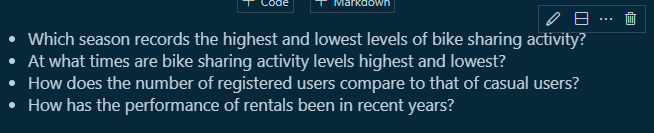

### Question 1: Which season records the highest and lowest levels of bike sharing activity?

C:\Users\PC\AppData\Local\Temp\ipykernel_25504\152008833.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\PC\AppData\Local\Temp\ipykernel_25504\152008833.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


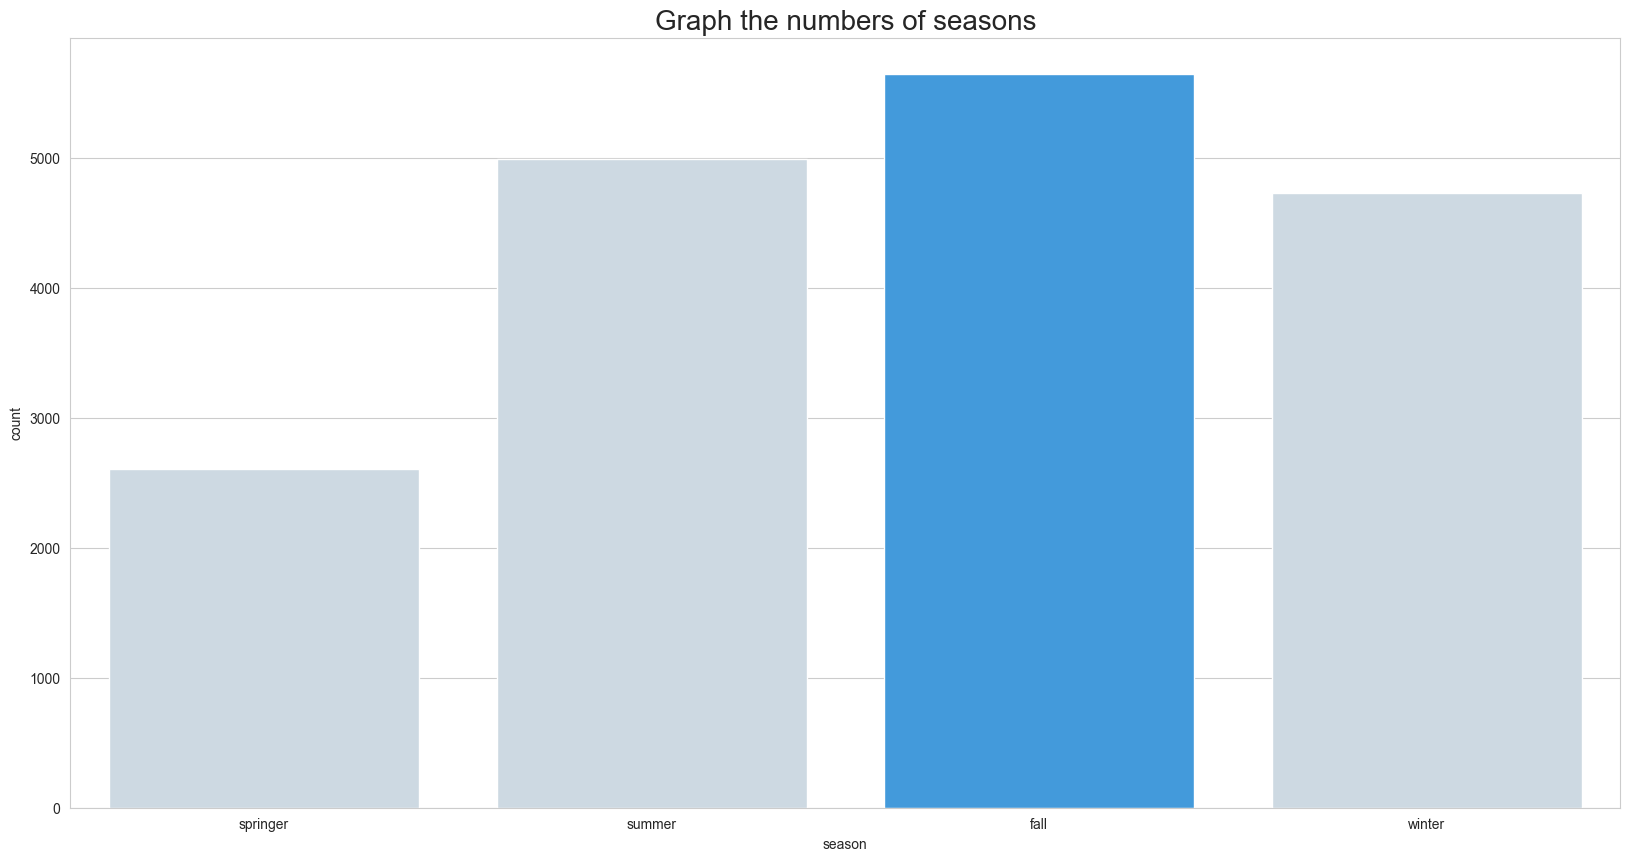

In [164]:
# Setting the color of bar plot
colors=["#c9dae6","#c9dae6","#2a9df4","#c9dae6"]

#Create subplot with size (20,10) inches
fig, ax = plt.subplots(figsize=(20,10))

#Bar plot visualization for x="season" and y="count" on yhe day_df dataset
sns.barplot(
    data = day_df,
    x = "season",
    y = "count",
    palette=colors,
    ax=ax,
    ci=None)

plt.title("Graph the numbers of seasons", fontsize=20)
plt.show()



From the graph above, the highest occurrence of bike sharing users is in the **fall season**. The number of users in the fall season is 1061129. 

### Question 2: What times are bike sharing activity levels highest and lowest?

In [172]:
#Highest order 
sum_order_items_df = hour_df.groupby("hour")["count"].sum().sort_values(ascending=False).reset_index()
Highest_order_by_hour=sum_order_items_df.head(5)

#Lowest order
lowest_order_by_hour=sum_order_items_df.sort_values(by="count",ascending=True).head(5)




C:\Users\PC\AppData\Local\Temp\ipykernel_25504\3508668158.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hour", y="count", data=Highest_order_by_hour, ax=ax[0], palette=["#c9dae6","#c9dae6","#2a9df4","#c9dae6","#c9dae6"])
C:\Users\PC\AppData\Local\Temp\ipykernel_25504\3508668158.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hour", y="count", data=lowest_order_by_hour, palette=["#c9dae6","#c9dae6","#c9dae6","#2a9df4","#c9dae6"],ax=ax[1])


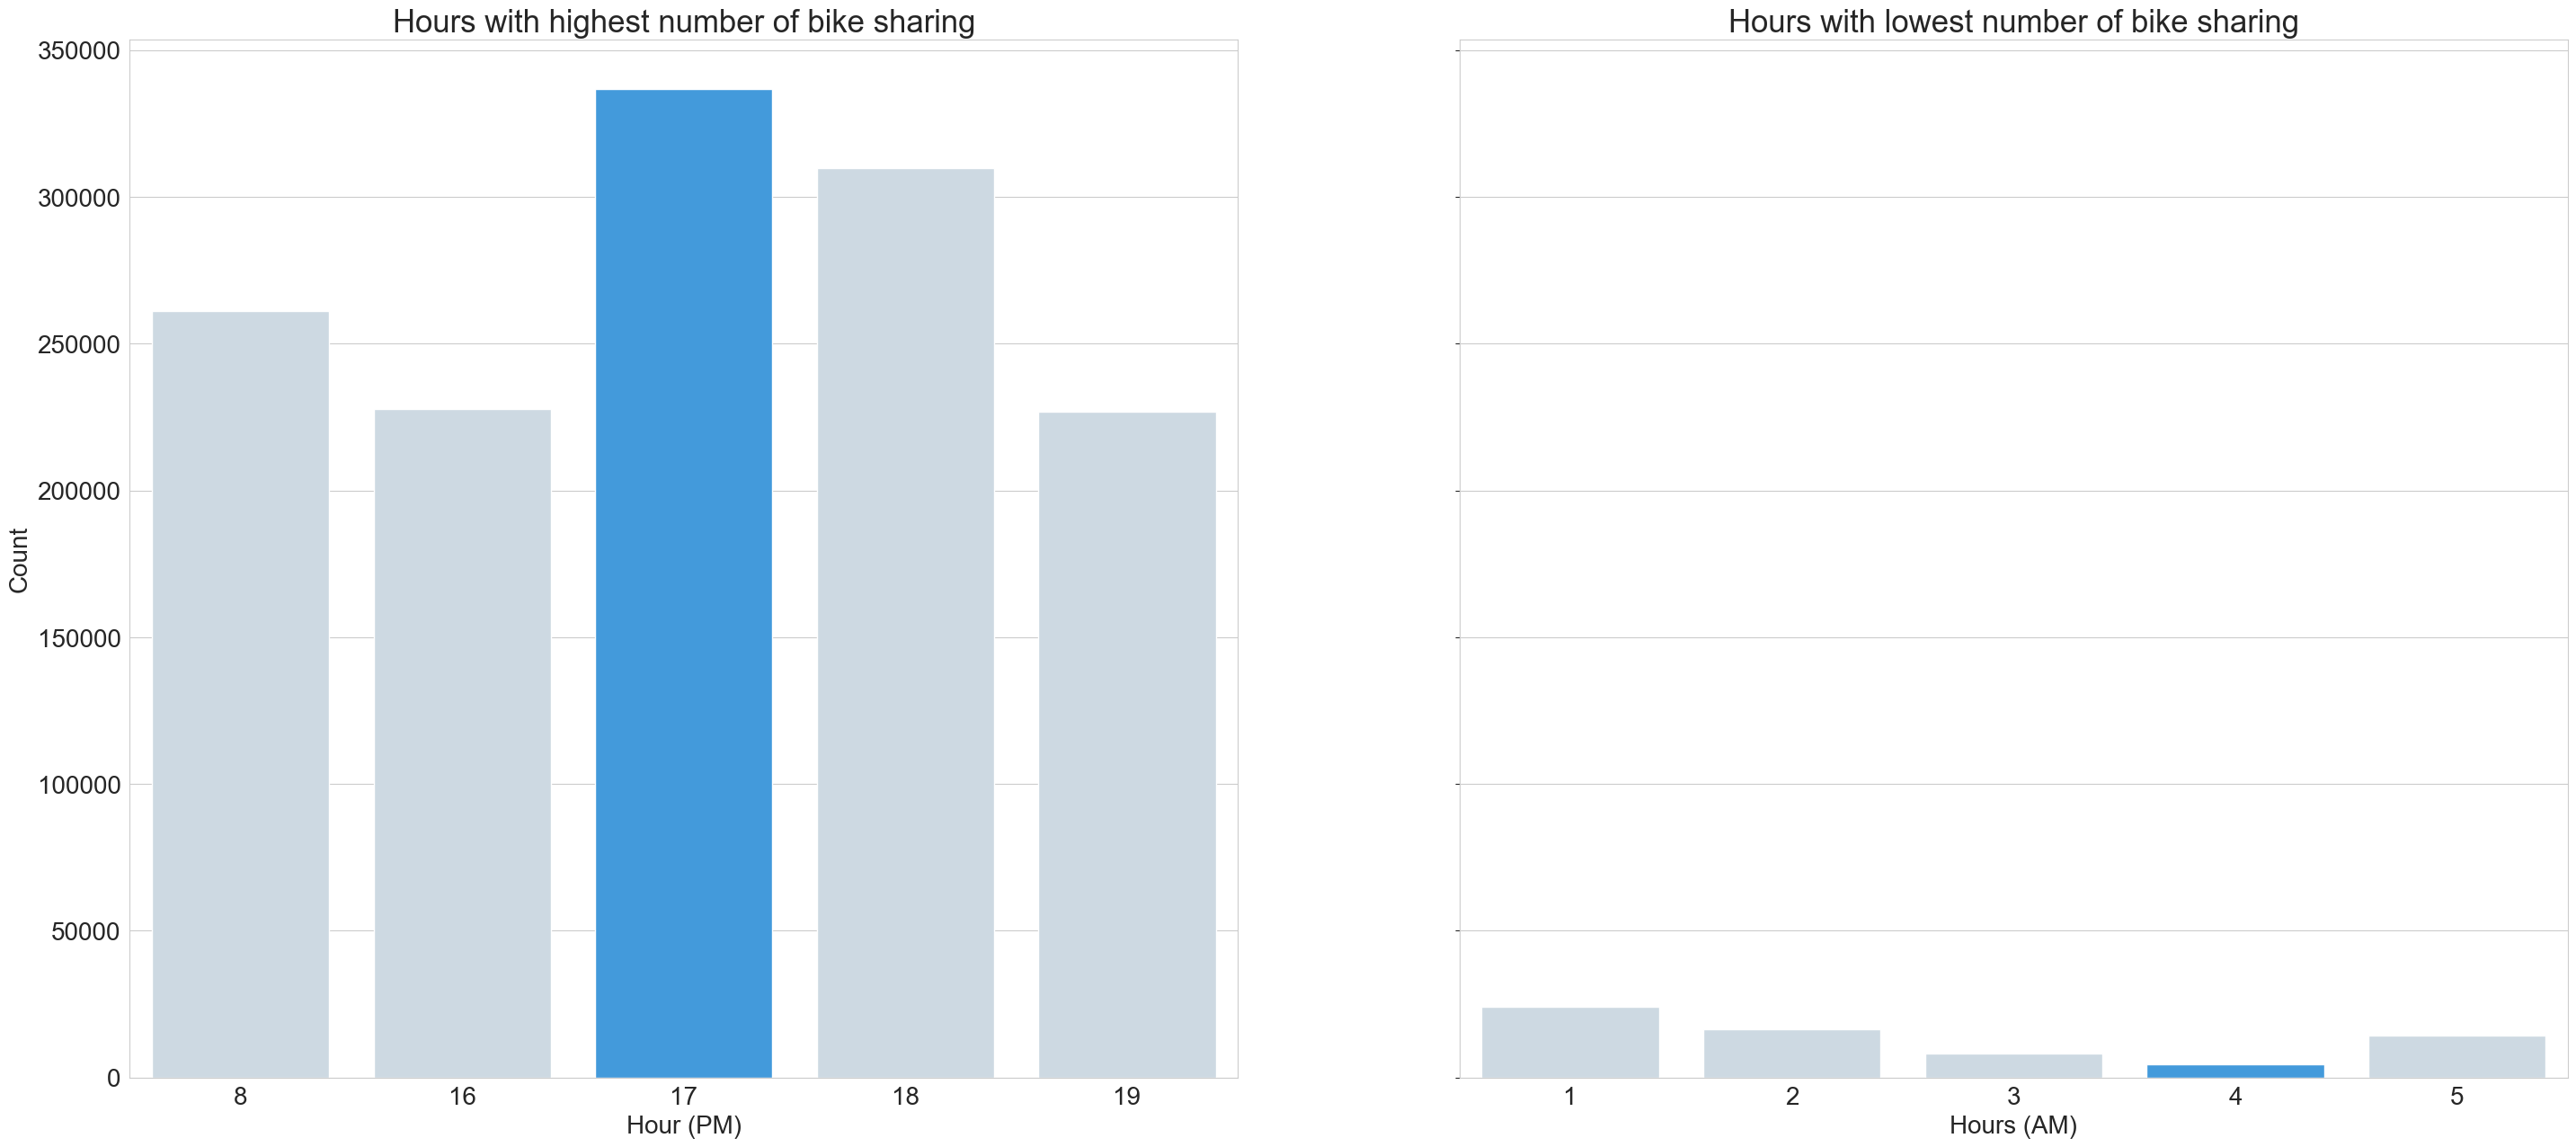

In [173]:
#Create subplot with size (35,15) inches with 2 columns
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(35, 15))

# create barplot for highest bike sharing users 
sns.barplot(x="hour", y="count", data=Highest_order_by_hour, ax=ax[0], palette=["#c9dae6","#c9dae6","#2a9df4","#c9dae6","#c9dae6"])
sns.set_style('whitegrid')

# setting first subplot 
ax[0].set_ylabel("Count",fontsize=20)
ax[0].set_xlabel("Hour (PM)", fontsize=20)
ax[0].set_title("Hours with highest number of bike sharing", fontsize=25)
ax[0].tick_params(axis='y', labelsize=20)
ax[0].tick_params(axis='x', labelsize=20)

# create barplot for lowest bike sharing users 
sns.barplot(x="hour", y="count", data=lowest_order_by_hour, palette=["#c9dae6","#c9dae6","#c9dae6","#2a9df4","#c9dae6"],ax=ax[1])
sns.set_style('whitegrid')

# setting second subplot 
ax[1].set_xlabel("Hours (AM)",  fontsize=20)
ax[1].set_title("Hours with lowest number of bike sharing", fontsize=25)
ax[1].yaxis.tick_left()
ax[1].tick_params(axis='y', labelsize=20)
ax[1].tick_params(axis='x', labelsize=20)

# show plot
plt.show()


Based on the graph above, we can observe that the time with the highest number of bike sharing users is at **17pm**, with a total of 336,860 users.<br> Meanwhile, the time with the lowest number of bike sharing users occurs at **4am**, with only 4,428 users.

### Question 3: How does the number of registered users compare to that of casual users?

In [182]:
# count of casual users and registered users
total_casual = sum(day_df["casual"])
total_registered =sum(day_df["registered"])
print("Numbers of casual users is: ", total_casual)
print("Numbers of registered users is: ", total_registered)

Numbers of casual users is:  620017
Numbers of registered users is:  2672662


Text(0.5, 1.0, 'User Type Percentage')

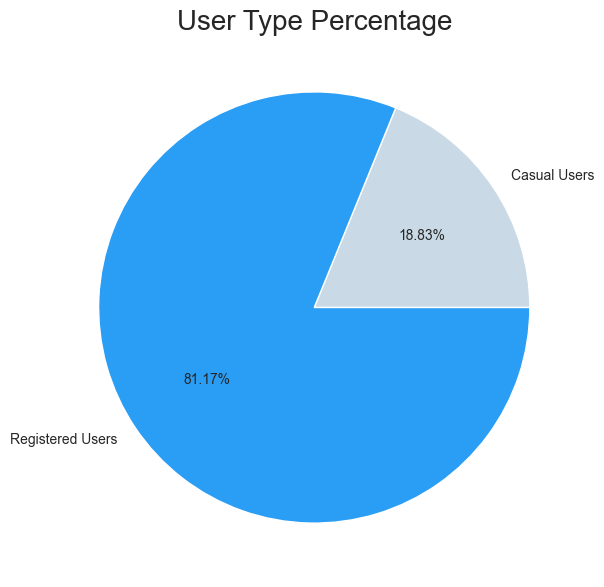

In [200]:
# Create pieplot
fig, ax = plt.subplots(figsize=(7,7))
ax.pie([total_casual,total_registered],
       labels=["Casual Users","Registered Users"],
       colors=["#c9dae6","#2a9df4"],
       autopct='%1.2f%%')
#Setting pieplot
plt.title("User Type Percentage", fontsize=20)

The percentage of registered users is 81.17%, meanwhile for casual users it is 18.83%.

### Question 4: How has the performance of rentals been in recent years?


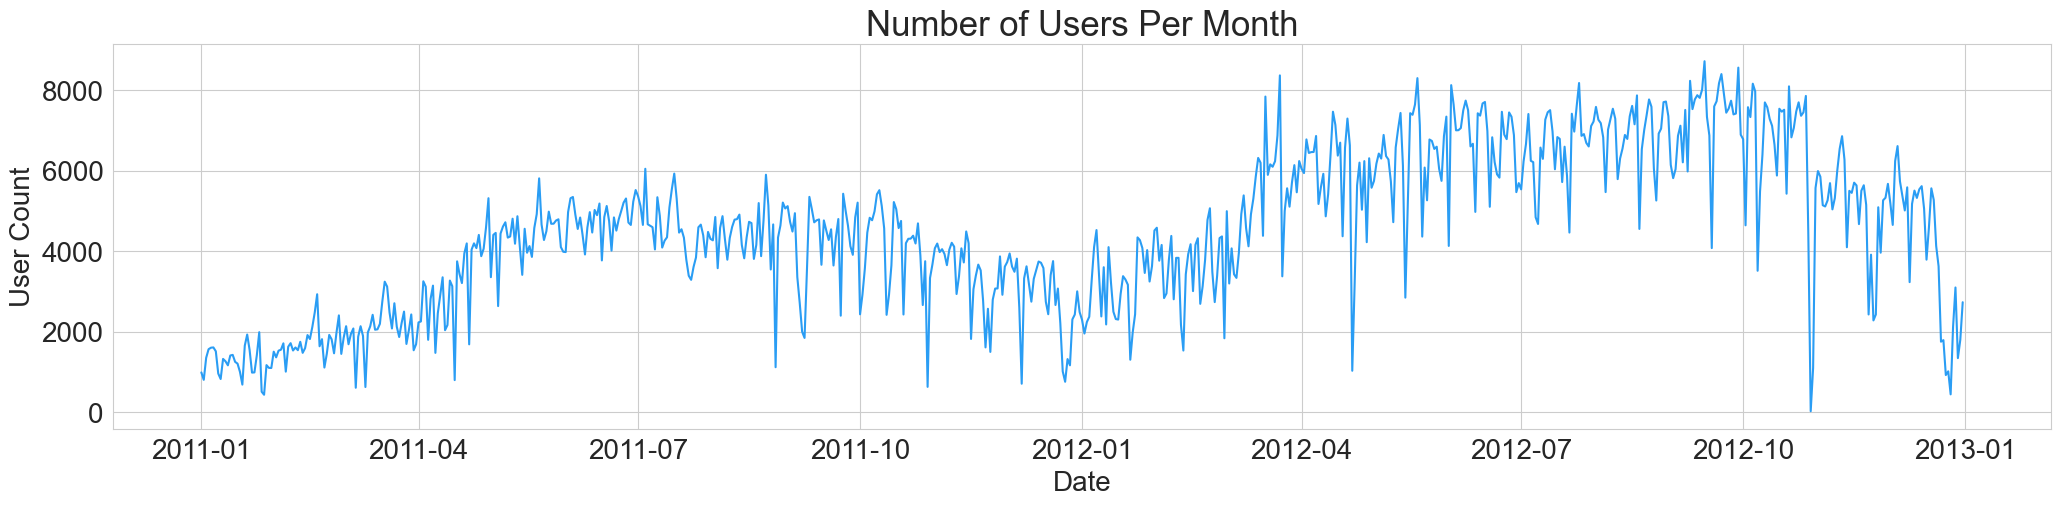

In [263]:
#count of user per month
monthly_counts = day_df['count'].groupby(day_df['date']).sum()

#Create line plot
fig, ax = plt.subplots(figsize=(25, 5))

ax.plot(monthly_counts.index, monthly_counts.values,color="#2a9df4")

#Setting plot
ax.set_xlabel("Date",  fontsize=20)
ax.set_ylabel("User Count", fontsize=20)
ax.set_title("Number of Users Per Month", fontsize=25)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)

#show plot
plt.show()

The resulting graph is highly fluctuating. Upon examination, the highest number of bike sharing users in 2012 occurred in September. However, the data also shows a significant decrease in October of the same year.

In [264]:
#index max and min
month_max_index=monthly_counts.idxmax()
month_min_index=monthly_counts.idxmin()

#Value of index max and min
month_max_value = monthly_counts.max()
month_min_value = monthly_counts.min()
print("The date with the highest count is: ", month_max_index)  
print("The value for this month is :", month_max_value)  
print("\n") 
print("The date with the lowest count is: ", month_min_index)
print("The value for this month is :", month_min_value)  


The date with the highest count is:  2012-09-15 00:00:00
The value for this month is : 8714


The date with the lowest count is:  2012-10-29 00:00:00
The value for this month is : 22


## Conclusion

1 Conclusion of Question 1: Which season records the highest and lowest levels of bike sharing activity?<br>
- From the graph above, the highest occurrence of bike sharing users is in the **fall season**. The number of users in the fall season is 1061129.<br> 

2 Conclusion of Question 2: At what times are bike sharing activity levels highest and lowest?<br>
- Based on the graph above, we can observe that the time with the highest number of bike sharing users is at **17pm**, with a total of 336,860 users. Meanwhile, the time with the lowest number of bike sharing users occurs at **4am**, with only 4,428 users. <br>

3 Conclusion of Question 3: How does the number of registered users compare to that of casual users?<br>
- The percentage of registered users is 81.17%, meanwhile for casual users it is 18.83%.<br>

4 Conclusion of Question 4: Question 4: How has the performance of rentals been in recent years?<br>
- The resulting graph is highly fluctuating. Upon examination, the highest number of bike sharing users in 2012 occurred in September. However, the data also shows a significant decrease in October of the same year.

## Advanced Analysis Techniques

### 1. Clustering Analysis

In [266]:
# Numbers of user base on weather situation
hour_df.groupby(by="weather_situation")["count"].nunique().sort_values(ascending=False)

C:\Users\PC\AppData\Local\Temp\ipykernel_25504\1576767323.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="weather_situation")["count"].nunique().sort_values(ascending=False)


weather_situation
Clear             848
Mist              649
Light_rainsnow    368
Heavy_rainsnow      3
Name: count, dtype: int64

bike sharing users are more common in weather **clear** situations

In [268]:
# Number of user base on humidity
hour_df.groupby(by="Category_Humidity").agg({
    "count": ["count"]})

C:\Users\PC\AppData\Local\Temp\ipykernel_25504\3924435324.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="Category_Humidity").agg({


,count
,count
Category_Humidity,
Too dry,3496
Ideal,5892
Too humid,7969


bike sharing users are more common in humidity **too humid** situations

### 2. RFM Analysis

RFM Analysis below is used to understand customer behavior based on three main factors:

- Recency (how recently customers interacted with the business)
- Frequency (how often customers interact)
- Monetary (how much money they spend)

In [272]:
current_date = max(hour_df['date'])
rfm_df = hour_df.groupby('registered').agg({
    'date': lambda x: (current_date - x.max()).days,  # Recency
    'count': 'sum'  # Monetary
}).reset_index()

# change the name column
rfm_df.columns = ['registered', 'Recency', 'Monetary']

print(rfm_df.head())

   registered  Recency  Monetary
0           0       38        35
1           1        0       294
2           2        1       648
3           3        0      1154
4           4        3      1602
